---

# Projet 2 : Concevez une application au service de la santé publique

---

# Table of contents

1. [Univariate analyses](#univariate_analyses)
    - [Countries](#countries)
    - [Product group](#product_group)
    - [Ingredients from palm oil](#ingredients_from_palm_oil)
    - [Ingredients maybe from palm oil](#ingredients_maybe_from_palm_oil)
    - [Creators](#creator)
    - [Nutrition grade](#nutrition_grade)
    - [Brands](#brands)
    - [Additives](#additives)
    - [_100g](#_100g)
    - [date_created](#date_created)
    - [last_modified](#last_modified)
2. [Bivariate analyses](#bivariate_analyses)
    - `Nutrition grade` vs `Country`
    - `energy_100g` vs `Country`
    - `fat_100g` vs `Country`
3. [Correlations between variables](#correlation)
4. [PCA](#PCA)

<a name='data_analysis'></a>
# Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.close("all")
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import f_oneway

from platform import python_version
print('Python:', python_version())
import matplotlib 
print('matplotlib: {}'.format(matplotlib.__version__))

Python: 3.8.8
matplotlib: 3.6.0


In [2]:
#!pip install matplotlib --upgrade --user
#!pip install dataframe_image

In [3]:
def aggregate(column_1, column_2, column_3):
    
    """
    Function to aggregate values of 3 series.
    
    INPUT: column_1 --series
           column_2 --series
           column_3 --series
    
    OUTPUT: agg --series
    """
    
    agg = pd.DataFrame(column_1.value_counts()).merge(column_2.value_counts(), how='outer', left_index=True, right_index=True)
    agg = agg.merge(column_3.value_counts(), how='outer', left_index=True, right_index=True)
    agg = agg.fillna(0)
    agg = (agg[agg.columns[0]] + agg[agg.columns[1]] + agg[agg.columns[2]]).sort_values(ascending=False)
    
    return agg

In [4]:
data = pd.read_csv('cleaned_data.csv',
                   sep=',',
                   parse_dates=['date_created', 'last_modified'],
                   low_memory=False)

In [5]:
print(data.info())
with pd.option_context('display.max_columns', None):
    display(data.head())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288941 entries, 0 to 288940
Data columns (total 34 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   code                                     288941 non-null  object        
 1   url                                      288941 non-null  object        
 2   creator                                  288941 non-null  object        
 3   product_name                             288941 non-null  object        
 4   ingredients_from_palm_oil_n              288941 non-null  object        
 5   ingredients_that_may_be_from_palm_oil_n  288941 non-null  object        
 6   nutrition_grade_fr                       288941 non-null  object        
 7   energy_100g                              288941 non-null  float64       
 8   fat_100g                                 288941 non-null  float64       
 9   saturated-fat_100g        

,code,url,creator,product_name,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,date_created,last_modified,country_1,country_2,country_3,brand_1,brand_2,brand_3,additive_1,additive_2,additive_3,additive_4,additive_5,additive_6,additive_7,additive_8,additive_9,additive_10,product_group
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,not specified,not specified,not specified,not specified,1031.871034,10.771763,4.240857,31.049571,14.112095,6.700509,0.871093,0.34302,2016-09-17 09:17:46,2016-09-17 09:18:13,en:france,not specified,not specified,ferme-t-y-r-nao,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified
1,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,not specified,0.0,0.0,b,1941.000000,17.860000,0.000000,60.710000,17.860000,17.860000,0.635000,0.25000,2017-03-09 14:32:37,2017-03-09 14:32:37,en:united-states,not specified,not specified,torn-glasser,not specified,not specified,peanuts,wheat-flour,flour,sugar,rice-flour,flour,tapioca-starch,starch,salt,leavening,not specified
2,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,not specified,0.0,0.0,d,2540.000000,57.140000,5.360000,17.860000,3.570000,17.860000,1.224280,0.48200,2017-03-09 10:35:31,2017-03-09 10:35:31,en:united-states,not specified,not specified,grizzlies,not specified,not specified,organic-hazelnuts,hazelnuts,organic-cashews,cashews,organic-walnuts-almonds,walnuts-almonds,almonds,organic-sunflower-oil,sunflower-oil,oil,not specified
3,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,not specified,0.0,0.0,not specified,1552.000000,1.430000,4.240857,77.140000,14.112095,8.570000,0.871093,0.34302,2017-03-09 10:34:13,2017-03-09 10:34:13,en:united-states,not specified,not specified,bob-s-red-mill,not specified,not specified,organic-polenta,polenta,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified
4,0000000016100,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,not specified,0.0,0.0,not specified,1933.000000,18.270000,1.920000,63.460000,11.540000,13.460000,0.871093,0.34302,2017-03-09 10:34:11,2017-03-09 10:34:11,en:united-states,not specified,not specified,unfi,not specified,not specified,rolled-oats,oats,grape-concentrate,concentrate,expeller-pressed-canola-oil,pressed-canola-oil,canola-oil,oil,sunflower-seeds,seeds,not specified


(288941, 34)


<a name='univariate_analyses'></a>
# 1. Univariate Analyses

<a name='countries'></a>
## `Country`

In [6]:
countries_agg = pd.DataFrame(aggregate(data['country_1'], data['country_2'], data['country_3']))

In [7]:
countries_agg = countries_agg.rename(columns={0: 'country'})
countries_agg['percentage'] = countries_agg['country'] / len(data) * 100
countries_agg['percentage'] = countries_agg['percentage'].round(2)
display(countries_agg)

,country,percentage
not specified,572890.0,198.27
en:united-states,150958.0,52.25
en:france,91769.0,31.76
en:switzerland,15540.0,5.38
en:germany,8005.0,2.77
...,...,...
en:etats-unis,1.0,0.00
en:virgin-islands-of-the-united-states,1.0,0.00
en:rwanda,1.0,0.00
en:worldwide,1.0,0.00


Text(0.5, 1.0, 'Répartition des produits par pays')

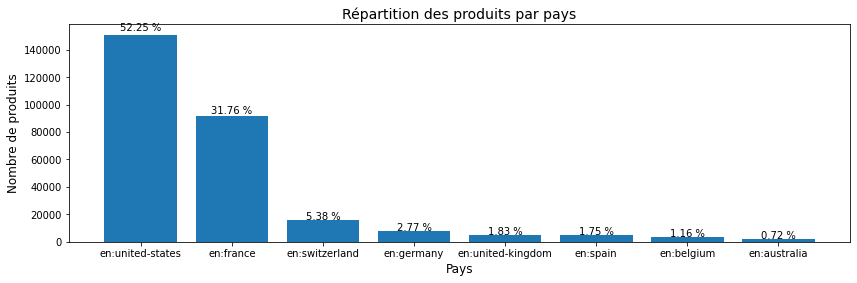

In [8]:
fig, ax = plt.subplots(figsize = (14,4))
graph = ax.bar(countries_agg.index[1:9], countries_agg['country'][1:9])

i = 1
for rect in graph:
    width = rect.get_width()
    height = rect.get_height()
    x, y = rect.get_xy()
    plt.text(x+width/2,
             y+height*1.02,
             str(countries_agg['percentage'][i])+' %',
             ha='center',
             #weight='bold',
            )
    i += 1

ax.set_xlabel('Pays', size=12)
ax.set_ylabel('Nombre de produits', size=12)
ax.set_title('Répartition des produits par pays', size=14)

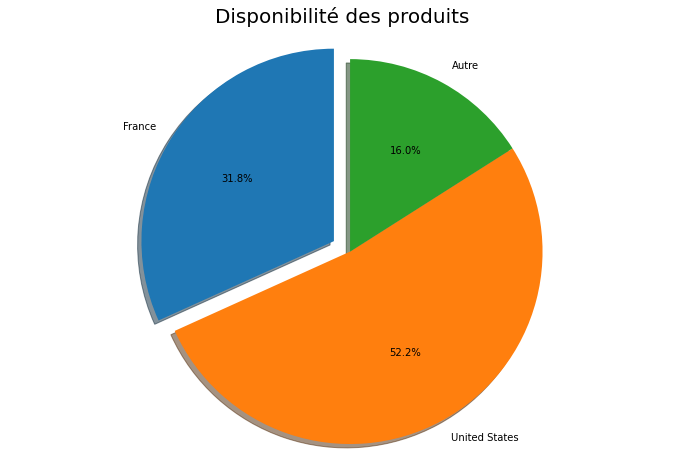

In [9]:
fig, ax = plt.subplots(figsize = (12,8))
ax.pie([countries_agg.loc[countries_agg.index == 'en:france', 'country'][0],
        countries_agg.loc[countries_agg.index == 'en:united-states', 'country'][0],
        len(data) - countries_agg.loc[countries_agg.index == 'en:france', 'country'][0] - countries_agg.loc[countries_agg.index == 'en:united-states', 'country'][0]],
       labels=['France', 'United States','Autre'],
       autopct='%1.1f%%',
       shadow=True,
       startangle=90,
       explode=(0.1, 0, 0))
ax.axis('equal')
ax.set_title('Disponibilité des produits', size=20)
plt.show()

#### Observations:

Most items in the database are available either in the US or in France, with only 16% available elsewhere.

<a name='product_group'></a>
## `Product group

In [10]:
products_agg = pd.DataFrame(data['product_group'].value_counts())

In [11]:
products_agg = products_agg.rename(columns={0: 'product_group'})
products_agg['percentage'] = products_agg['product_group'] / len(data) * 100
products_agg['percentage'] = products_agg['percentage'].round(2)
display(products_agg)

,product_group,percentage
not specified,225072,77.90
Sugary snacks,11020,3.81
Beverages,8806,3.05
Cereals and potatoes,8304,2.87
Milk and dairy products,8154,2.82
Fish Meat Eggs,7475,2.59
Composite foods,6688,2.31
Fruits and vegetables,5812,2.01
Fat and sauces,3556,1.23
Salty snacks,2565,0.89


Text(0.5, 1.0, 'Produits les plus listés')

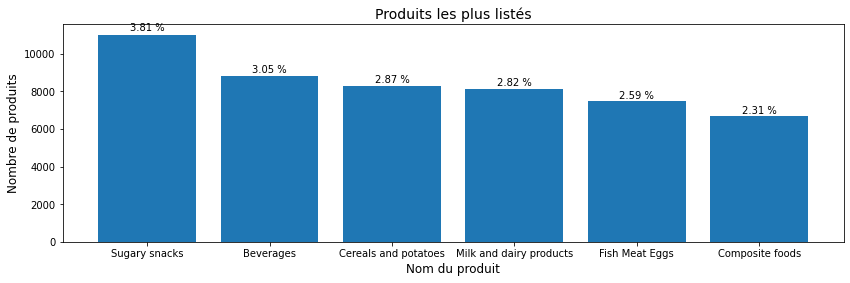

In [12]:
fig, ax = plt.subplots(figsize = (14,4))
graph = ax.bar(products_agg.index[1:7], products_agg['product_group'][1:7])

i = 1
for rect in graph:
    width = rect.get_width()
    height = rect.get_height()
    x, y = rect.get_xy()
    plt.text(x+width/2,
             y+height*1.02,
             str(products_agg['percentage'][i])+' %',
             ha='center',
             #weight='bold',
            )
    i += 1

ax.set_xlabel('Nom du produit', size=12)
ax.set_ylabel('Nombre de produits', size=12)
ax.set_title('Produits les plus listés', size=14)

<a name='ingredients_from_palm_oil'></a>
## `Ingredients from palm oil`

In [13]:
ingredients_from_palm_oil = pd.DataFrame(data['ingredients_from_palm_oil_n'].value_counts().sort_index(ascending=True))

In [14]:
ingredients_from_palm_oil = ingredients_from_palm_oil.rename(index={'0.0': 'Aucun',
                                                                    '1.0': '1',
                                                                    '2.0': '2',
                                                                    'not specified': 'Non renseigné'})
display(ingredients_from_palm_oil)

,ingredients_from_palm_oil_n
Aucun,216001
1,4401
2,57
Non renseigné,68482


Text(0.5, 1.0, 'Number of ingredients from palm oil')

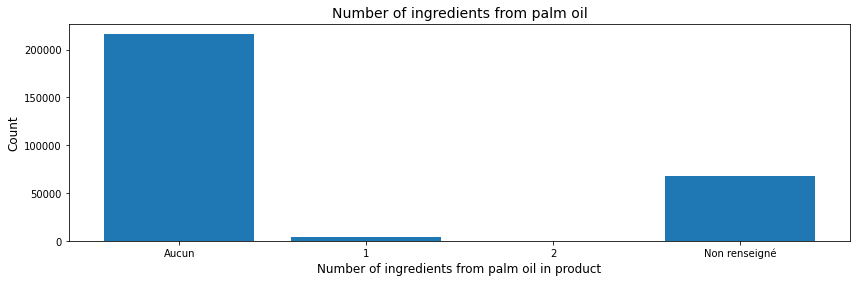

In [15]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(ingredients_from_palm_oil.index, ingredients_from_palm_oil['ingredients_from_palm_oil_n'].values)
ax.set_xlabel('Number of ingredients from palm oil in product', size=12)
ax.set_ylabel('Count', size=12)
ax.set_title('Number of ingredients from palm oil', size=14)

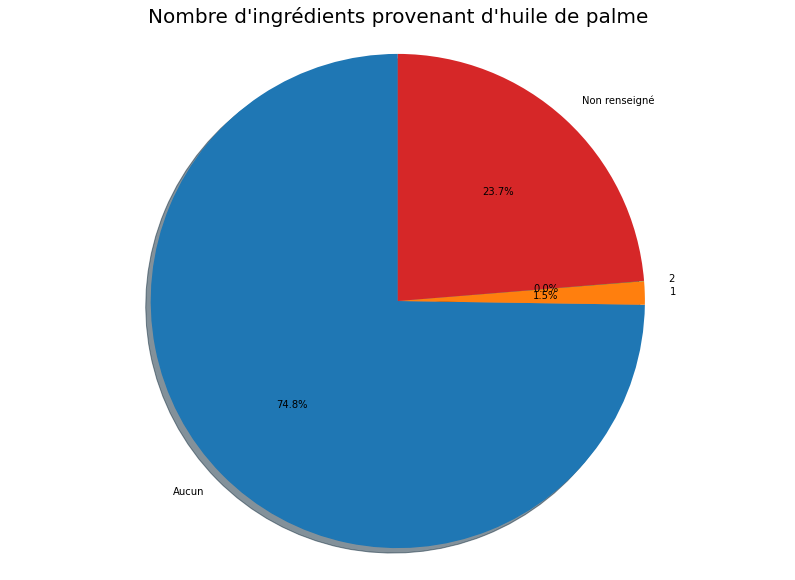

In [16]:
fig, ax = plt.subplots(figsize = (14,10))
ax.pie(ingredients_from_palm_oil['ingredients_from_palm_oil_n'],
       labels=ingredients_from_palm_oil.index,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90)
ax.axis('equal')
ax.set_title("Nombre d'ingrédients provenant d'huile de palme", size=20)
plt.show()

<a name='ingredients_maybe_from_palm_oil'></a>
## `Ingredients maybe from palm oil`

In [17]:
ingredients_maybe_from_palm_oil = pd.DataFrame(data['ingredients_that_may_be_from_palm_oil_n'].value_counts().sort_index(ascending=True))

In [18]:
ingredients_maybe_from_palm_oil = ingredients_maybe_from_palm_oil.rename(index={'0.0': 'Aucun',
                                                                                '1.0': '1',
                                                                                '2.0': '2',
                                                                                '3.0': '3',
                                                                                '4.0': '4',
                                                                                '5.0': '5',
                                                                                '6.0': '6',
                                                                                'not specified': 'Non renseigné'})
display(ingredients_maybe_from_palm_oil)

,ingredients_that_may_be_from_palm_oil_n
Aucun,209493
1,9391
2,1259
3,265
4,45
5,5
6,1
Non renseigné,68482


Text(0.5, 1.0, 'Number of ingredients that may be from palm oil')

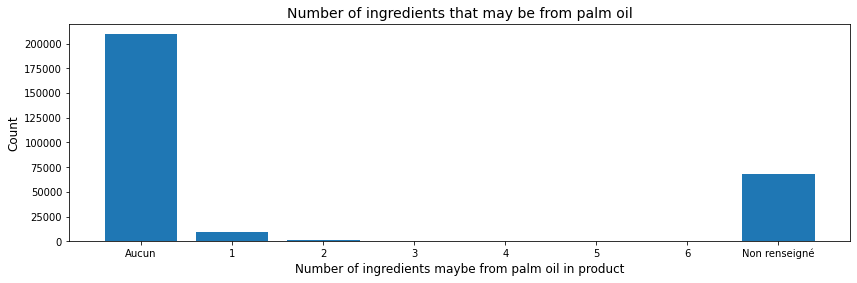

In [19]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(ingredients_maybe_from_palm_oil.index, ingredients_maybe_from_palm_oil['ingredients_that_may_be_from_palm_oil_n'])
ax.set_xlabel('Number of ingredients maybe from palm oil in product', size=12)
ax.set_ylabel('Count', size=12)
ax.set_title('Number of ingredients that may be from palm oil', size=14)

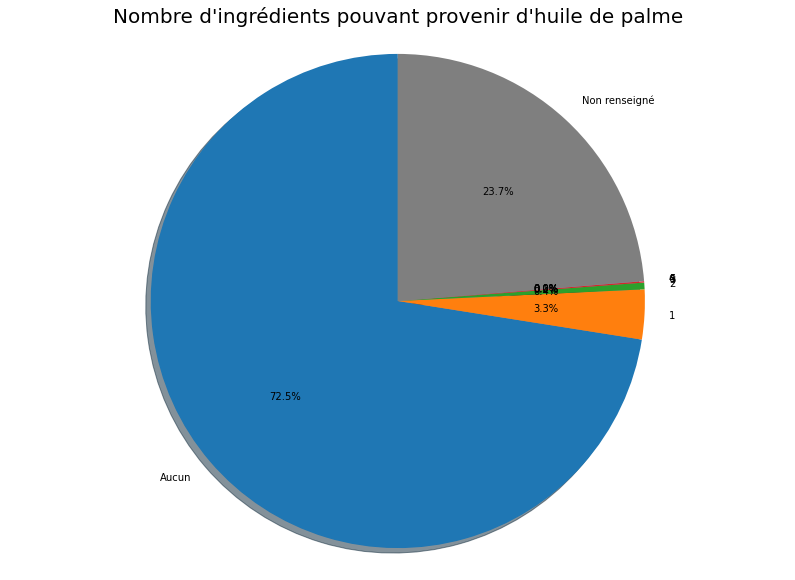

In [20]:
fig, ax = plt.subplots(figsize = (14,10))
ax.pie(ingredients_maybe_from_palm_oil['ingredients_that_may_be_from_palm_oil_n'],
       labels=ingredients_maybe_from_palm_oil.index,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90)
ax.axis('equal')
ax.set_title("Nombre d'ingrédients pouvant provenir d'huile de palme", size=20)
plt.show()

<a name='creator'></a>
## `Creator`

### Contribution by creators

In [21]:
creators_agg = pd.DataFrame(data['creator'].value_counts())

In [22]:
creators_agg = creators_agg.rename(columns={0: 'creator'})
creators_agg['percentage'] = creators_agg['creator'] / len(data) * 100
creators_agg['percentage'] = creators_agg['percentage'].round(2)
display(creators_agg)

,creator,percentage
usda-ndb-import,147638,51.10
openfoodfacts-contributors,38234,13.23
kiliweb,12109,4.19
date-limite-app,11647,4.03
openfood-ch-import,10483,3.63
...,...,...
abonne31,1,0.00
alexfloresveliz,1,0.00
celiou,1,0.00
mikaaz,1,0.00


Text(0.5, 1.0, 'Contribution des plus gros créateurs')

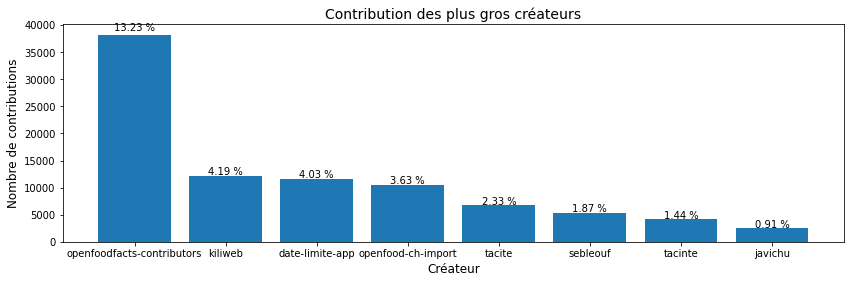

In [23]:
fig, ax = plt.subplots(figsize = (14,4))
graph = ax.bar(creators_agg.index[1:9], creators_agg['creator'][1:9])

i = 1
for rect in graph:
    width = rect.get_width()
    height = rect.get_height()
    x, y = rect.get_xy()
    plt.text(x+width/2,
             y+height*1.02,
             str(creators_agg['percentage'][i])+' %',
             ha='center',
             #weight='bold',
            )
    i += 1

ax.set_xlabel('Créateur', size=12)
ax.set_ylabel('Nombre de contributions', size=12)
ax.set_title('Contribution des plus gros créateurs', size=14)

<a name='nutrition_grade'></a>
## `Nutrition grade`

### Nutrition grade repartition

In [24]:
nutrition_grade_agg = pd.DataFrame(data['nutrition_grade_fr'].value_counts().sort_index(ascending=True))

In [25]:
nutrition_grade_agg = nutrition_grade_agg.rename(index={'not specified': 'Non renseigné'})

Text(0.5, 1.0, 'Nutrition grade repartition')

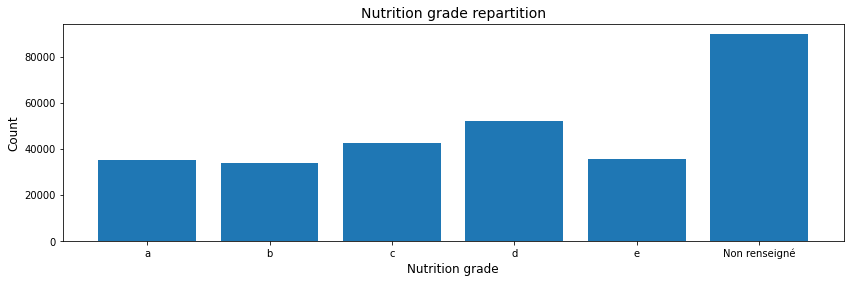

In [26]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(nutrition_grade_agg.index, nutrition_grade_agg['nutrition_grade_fr'])
ax.set_xlabel('Nutrition grade', size=12)
ax.set_ylabel('Count', size=12)
ax.set_title('Nutrition grade repartition', size=14)

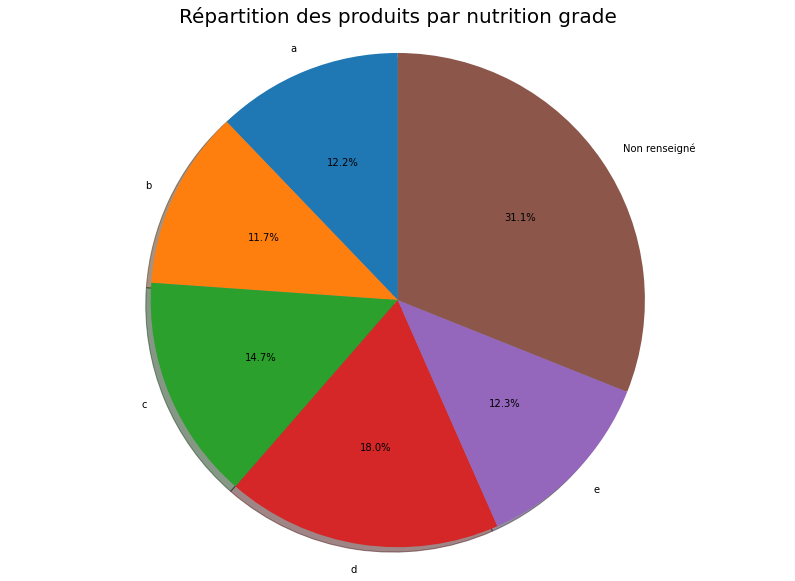

In [27]:
fig, ax = plt.subplots(figsize = (14,10))
ax.pie(nutrition_grade_agg['nutrition_grade_fr'], labels=nutrition_grade_agg.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
ax.set_title('Répartition des produits par nutrition grade', size=20)
plt.show()

#### Observations:

There is a relatively equal split between the different nutrition grades.

<a name='brands'></a>
## `Brand`

In [28]:
brands_agg = pd.DataFrame(aggregate(data['brand_1'], data['brand_2'], data['brand_3']))

In [29]:
brands_agg = brands_agg.rename(columns={0: 'brand'})

Text(0.5, 1.0, 'Répartition des marques les plus renseignées')

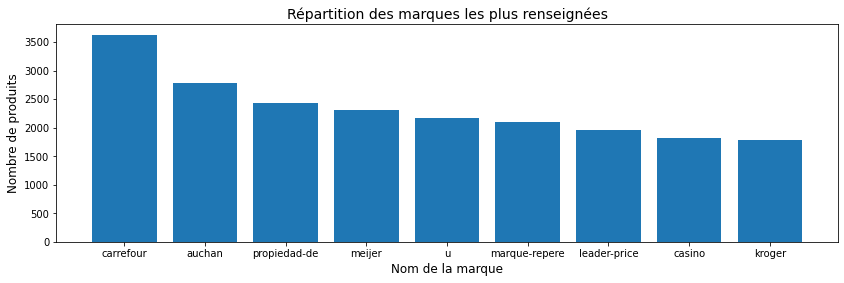

In [30]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(brands_agg.index[1:10], brands_agg['brand'][1:10])
ax.set_xlabel('Nom de la marque', size=12)
ax.set_ylabel('Nombre de produits', size=12)
ax.set_title('Répartition des marques les plus renseignées', size=14)

<a name='additives'></a>
## `Additive`

In [31]:
additives_agg = pd.DataFrame(data['additive_1'].value_counts()).merge(data['additive_2'].value_counts(),
                                                                      how='outer',
                                                                      left_index=True,
                                                                      right_index=True)
additives_agg = additives_agg.merge(data['additive_3'].value_counts(), how='outer', left_index=True, right_index=True)
additives_agg = additives_agg.merge(data['additive_4'].value_counts(), how='outer', left_index=True, right_index=True)
additives_agg = additives_agg.merge(data['additive_5'].value_counts(), how='outer', left_index=True, right_index=True)
additives_agg = additives_agg.merge(data['additive_6'].value_counts(), how='outer', left_index=True, right_index=True)
additives_agg = additives_agg.merge(data['additive_7'].value_counts(), how='outer', left_index=True, right_index=True)
additives_agg = additives_agg.merge(data['additive_8'].value_counts(), how='outer', left_index=True, right_index=True)
additives_agg = additives_agg.merge(data['additive_9'].value_counts(), how='outer', left_index=True, right_index=True)
additives_agg = additives_agg.merge(data['additive_10'].value_counts(), how='outer', left_index=True, right_index=True)

additives_agg = additives_agg.fillna(0)
additives_agg = (additives_agg[additives_agg.columns[0]]
                 + additives_agg[additives_agg.columns[1]]
                 + additives_agg[additives_agg.columns[2]]
                 + additives_agg[additives_agg.columns[3]]
                 + additives_agg[additives_agg.columns[4]]
                 + additives_agg[additives_agg.columns[5]]
                 + additives_agg[additives_agg.columns[6]]
                 + additives_agg[additives_agg.columns[7]]
                 + additives_agg[additives_agg.columns[8]]
                 + additives_agg[additives_agg.columns[9]]).sort_values(ascending=False)

In [32]:
additives_agg = pd.DataFrame(additives_agg)
additives_agg = additives_agg.rename(columns={0: 'additive'})
additives_agg['percentage'] = additives_agg['additive'] / len(data) * 100
additives_agg['percentage'] = additives_agg['percentage'].round(2)

In [33]:
additives_agg

,additive,percentage
not specified,950840.0,329.08
water,55689.0,19.27
flour,47806.0,16.55
sugar,47637.0,16.49
salt,32426.0,11.22
...,...,...
iron-riboflavin,1.0,0.00
arome-naturel-citron-vert-1,1.0,0.00
iron-phosphate-niacin-thiamine-mononitrate-folic-acid,1.0,0.00
arome-naturel-citron-vert-1-2,1.0,0.00


Text(0.5, 1.0, "Répartition de la présence d'additifs dans les produits")

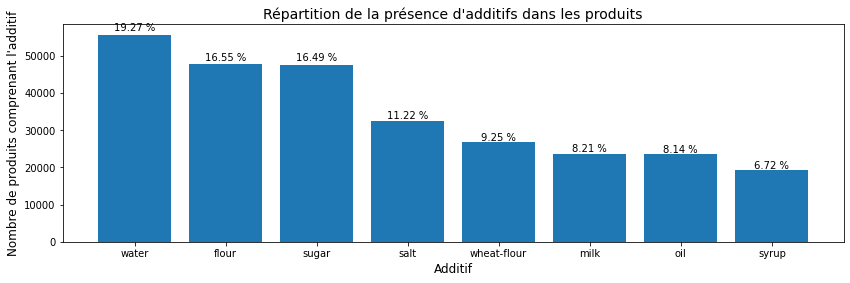

In [34]:
fig, ax = plt.subplots(figsize = (14,4))
graph = ax.bar(additives_agg.index[1:9], additives_agg['additive'][1:9])

i = 1
for rect in graph:
    width = rect.get_width()
    height = rect.get_height()
    x, y = rect.get_xy()
    plt.text(x+width/2,
             y+height*1.02,
             str(additives_agg['percentage'][i])+' %',
             ha='center',
             #weight='bold',
            )
    i += 1

ax.set_xlabel('Additif', size=12)
ax.set_ylabel("Nombre de produits comprenant l'additif", size=12)
ax.set_title("Répartition de la présence d'additifs dans les produits", size=14)

<a name='_100g'></a>
## *Per 100g* components

In [35]:
num_cols = data.select_dtypes(include=np.number).columns.tolist()
cols_100g = num_cols.copy()
cols_100g.remove('energy_100g')
print(cols_100g)

['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']


### Boxplots

<AxesSubplot: >

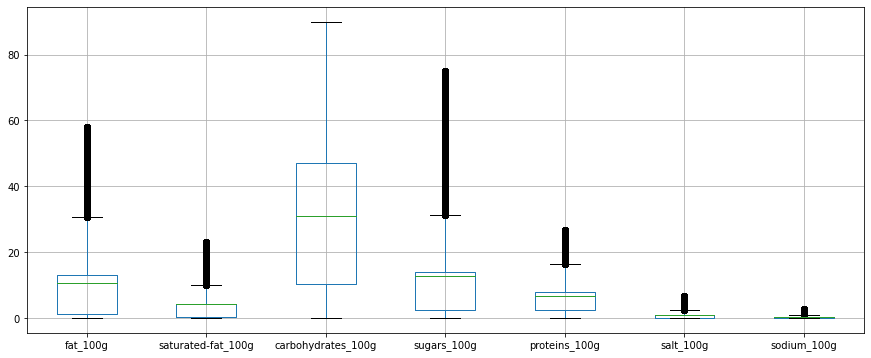

In [36]:
plt.figure(figsize=(15,6))
data.boxplot(column=cols_100g)

## `energy_100g`

<AxesSubplot: >

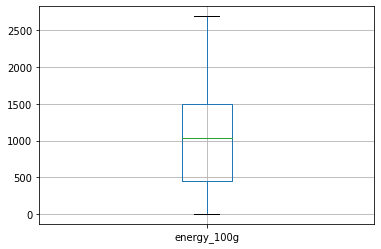

In [37]:
data.boxplot(column="energy_100g")

(array([ 8474.,  8346., 26590., 25544., 22040., 21583., 87196., 42287.,
        31032., 15849.]),
 array([ 0.        ,  5.18652099, 10.37304198, 15.55956298, 20.74608397,
        25.93260496, 31.11912595, 36.30564694, 41.49216794, 46.67868893,
        51.86520992]),
 <BarContainer object of 10 artists>)

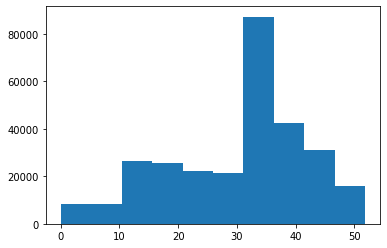

In [38]:
plt.hist(np.sqrt(data['energy_100g']), bins=10)

<a name='date_created'></a>
## `Date created`

Text(0.5, 1.0, 'Date de création des produits')

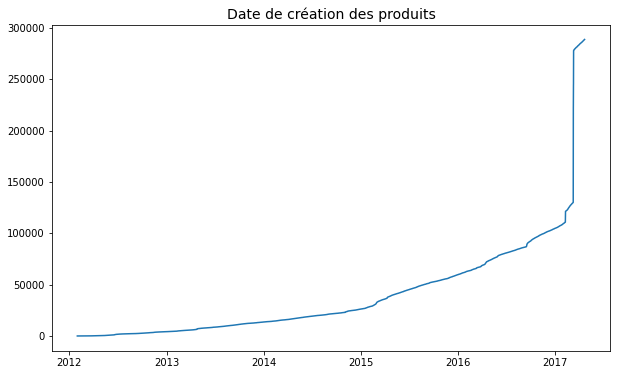

In [39]:
plt.figure(figsize=(10,6))
plt.plot(data['date_created'].sort_values(ascending=True), range(len(data)), '-')
plt.title('Date de création des produits', size=14)

#### Observations:

We can see that items are added steadily over time, with a huge spike of added items in 2017.

<a name='last_modified'></a>
## `Last modified`

Text(0.5, 1.0, 'Date de dernière modification des produits (trié par date de création)')

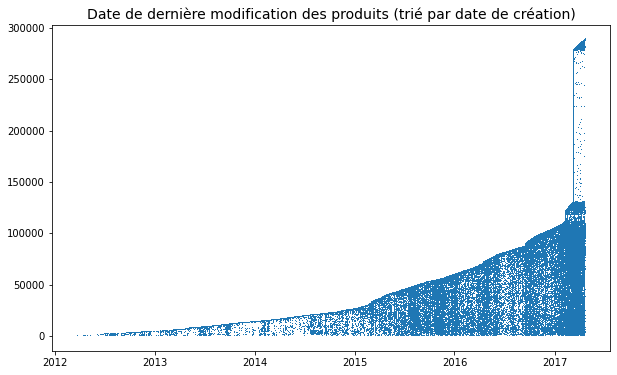

In [40]:
plt.figure(figsize=(10,6))
plt.plot(data.sort_values(by='date_created', ascending=True)['last_modified'], range(len(data)), ',')
plt.title('Date de dernière modification des produits (trié par date de création)', size=14)

#### Observations:

This shows us that even items created a long time ago keep getting modified.

<a name='bivariate_analyses'></a>
# 2. Bivariate analyses

## `Nutrition grade` vs `Country`

In [41]:
grade_agg_fr = data[(data['country_1'] == 'en:france')
                    | (data['country_2'] == 'en:france')
                    | (data['country_3'] == 'en:france')]['nutrition_grade_fr'].value_counts().sort_index(ascending=True)
grade_agg_us = data[(data['country_1'] == 'en:united-states')
                    | (data['country_2'] == 'en:united-states')
                    | (data['country_3'] == 'en:united-states')]['nutrition_grade_fr'].value_counts().sort_index(ascending=True)
grade_agg_other = data[(data['country_1'] != 'en:france')
                       & (data['country_1'] != 'en:united-states')
                       & (data['country_2'] != 'en:france')
                       & (data['country_2'] != 'en:united-states')
                       & (data['country_3'] != 'en:france')
                       & (data['country_3'] != 'en:united-states')
                      ]['nutrition_grade_fr'].value_counts().sort_index(ascending=True)

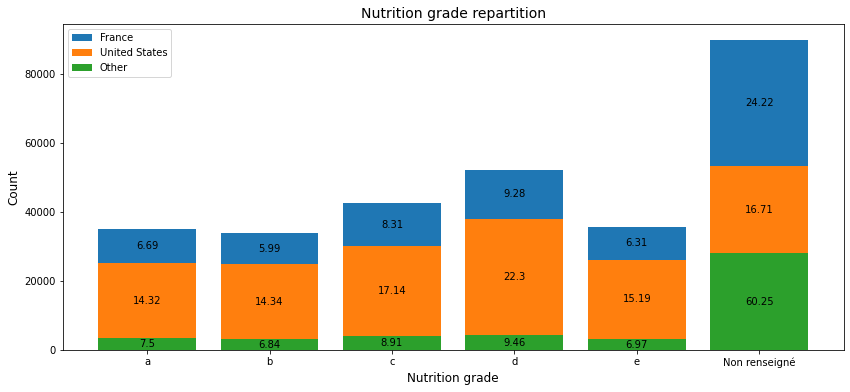

In [42]:
fig, ax = plt.subplots(figsize = (14,6))

fr = ax.bar(nutrition_grade_agg.index, grade_agg_fr.values, bottom=grade_agg_us.values + grade_agg_other.values, label='France')
us = ax.bar(nutrition_grade_agg.index, grade_agg_us.values, bottom=grade_agg_other.values, label='United States')
other = ax.bar(nutrition_grade_agg.index, grade_agg_other.values, label='Other')

ax.set_xlabel('Nutrition grade', size=12)
ax.set_ylabel('Count', size=12)
ax.legend()
ax.set_title('Nutrition grade repartition', size=14)
ax.bar_label(fr,
             labels=np.round(grade_agg_fr.values / len(data[(data['country_1'] == 'en:united-states')
                                                            | (data['country_2'] == 'en:united-states')
                                                            | (data['country_3'] == 'en:united-states')]) * 100, 2).astype('str'),
             label_type='center')
ax.bar_label(us,
             labels=np.round(grade_agg_us.values / len(data[(data['country_1'] == 'en:united-states')
                                                            | (data['country_2'] == 'en:united-states')
                                                            | (data['country_3'] == 'en:united-states')]) * 100, 2).astype('str'),
             label_type='center')
ax.bar_label(other,
             labels=np.round(grade_agg_other.values / len(data[(data['country_1'] != 'en:france')
                                                               & (data['country_1'] != 'en:united-states')
                                                               & (data['country_2'] != 'en:france')
                                                               & (data['country_2'] != 'en:united-states')
                                                               & (data['country_3'] != 'en:united-states')]) * 100, 2).astype('str'),
             label_type='center')

plt.show()

## `energy_100g` vs `Country`

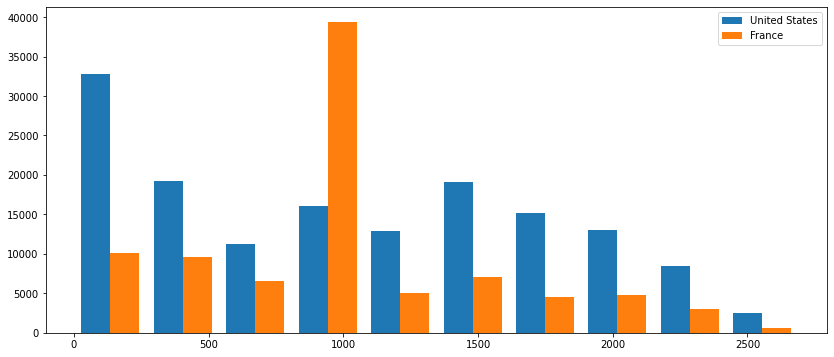

In [43]:
fig, ax = plt.subplots(figsize = (14,6))
plt.hist([data[data['country_1'] == 'en:united-states']['energy_100g'],
          data[data['country_1'] == 'en:france']['energy_100g']], bins=10, label=['United States', 'France'])
ax.legend()
plt.show()

## `fat_100g` vs `Country`

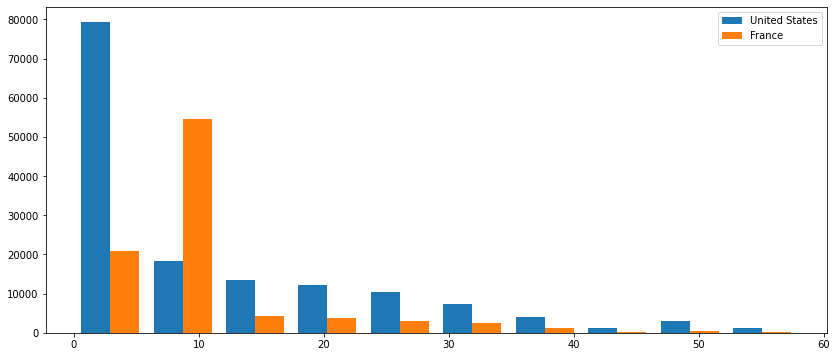

In [44]:
fig, ax = plt.subplots(figsize = (14,6))
plt.hist([data[data['country_1'] == 'en:united-states']['fat_100g'],
          data[data['country_1'] == 'en:france']['fat_100g']], bins=10, label=['United States', 'France'])
ax.legend()
plt.show()

<a name='correlation'></a>
# 3. Correlations

## Correlation matrix

- Pearson: linear relationships
- Spearmon: monotonic relationships

In [45]:
corrMatrix = data.corr(method='spearman')

In [46]:
corrMatrix.style.applymap(lambda x: 'background-color : lightgreen' if (x >= 0.65) & (x < 0.9)
                          else 'background-color : green' if (x >= 0.9) & (x != 1)
                          else '')
#corrMatrix.export('corrMatrix.png')

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
energy_100g,1.000000,0.693835,0.479468,0.680469,0.337112,0.487553,0.210377,0.210139
fat_100g,0.693835,1.000000,0.689579,0.210727,0.138818,0.474076,0.354985,0.354812
saturated-fat_100g,0.479468,0.689579,1.000000,0.081894,0.257993,0.250525,0.189149,0.189035
carbohydrates_100g,0.680469,0.210727,0.081894,1.000000,0.537793,0.147273,-0.041932,-0.042211
sugars_100g,0.337112,0.138818,0.257993,0.537793,1.000000,-0.195483,-0.201003,-0.201176
proteins_100g,0.487553,0.474076,0.250525,0.147273,-0.195483,1.000000,0.368595,0.368478
salt_100g,0.210377,0.354985,0.189149,-0.041932,-0.201003,0.368595,1.000000,0.999623
sodium_100g,0.210139,0.354812,0.189035,-0.042211,-0.201176,0.368478,0.999623,1.000000


#### Observations:

`sodium_100g` super correlated with `salt_100g`, which is logical since salt is basically sodium.

## Correlation heatmap

<AxesSubplot: >

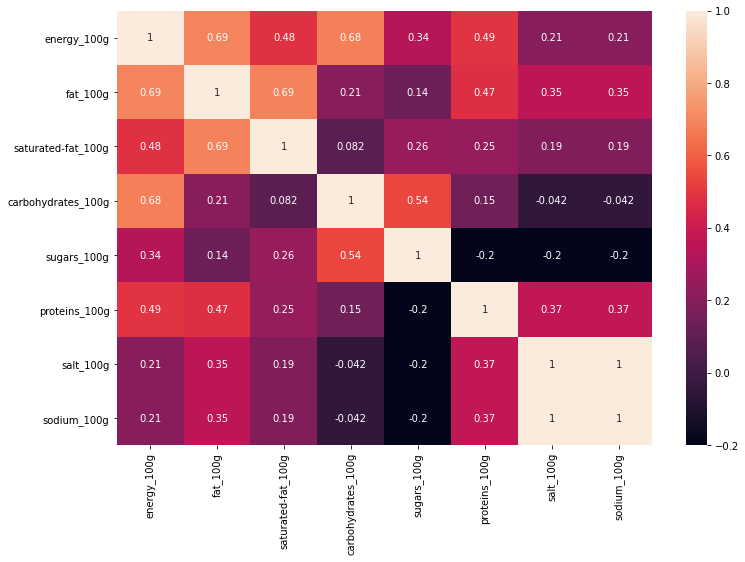

In [47]:
plt.figure(figsize=(12,8))
sns.heatmap(corrMatrix, annot=True)

## Salt vs Sodium - 1

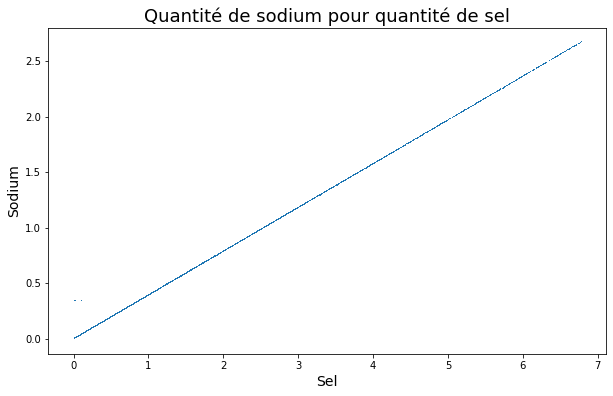

In [48]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(data['salt_100g'], data['sodium_100g'], ',')
ax.set_xlabel('Sel', size=14)
ax.set_ylabel("Sodium", size=14)
plt.title('Quantité de sodium pour quantité de sel', size=18)
plt.show()

In [49]:
data[['product_group', 'sodium_100g']].sort_values(by='sodium_100g', ascending=False).head(10)

,product_group,sodium_100g
41253,not specified,2.667
13132,not specified,2.667
124993,not specified,2.667
9457,not specified,2.667
87912,not specified,2.667
12280,not specified,2.667
45083,not specified,2.667
101603,not specified,2.667
51315,not specified,2.667
55904,not specified,2.667


In [50]:
data[['product_group', 'salt_100g']].sort_values(by='salt_100g', ascending=False).head(10)

,product_group,salt_100g
84312,not specified,6.77418
97181,not specified,6.77418
12280,not specified,6.77418
41253,not specified,6.77418
109709,not specified,6.77418
45083,not specified,6.77418
51315,not specified,6.77418
149347,not specified,6.77418
68474,not specified,6.77418
284763,not specified,6.77418


## Energy vs Fat - 0.69

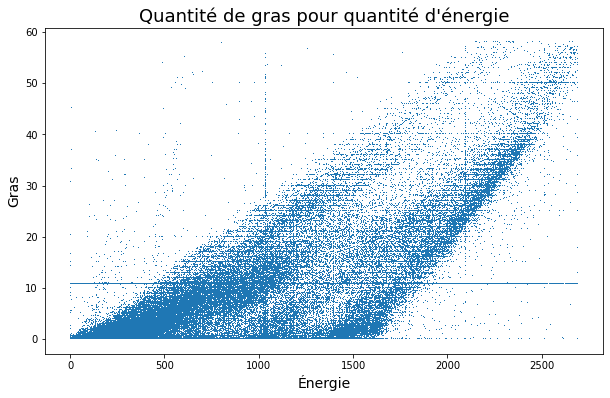

In [51]:
# rajouter grade en couleur # rajouter grade en couleur # rajouter grade en couleur # rajouter grade en couleur 

fig, ax = plt.subplots(figsize=(10,6))
plt.plot(data['energy_100g'], data['fat_100g'], ',')
ax.set_xlabel('Énergie', size=14)
ax.set_ylabel("Gras", size=14)
plt.title("Quantité de gras pour quantité d'énergie", size=18)
plt.show()

## Energy vs Salt 0.22

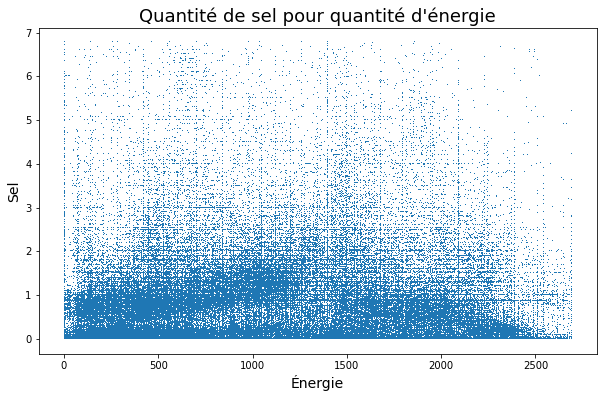

In [52]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(data['energy_100g'], data['salt_100g'], ',')
ax.set_xlabel('Énergie', size=14)
ax.set_ylabel("Sel", size=14)
plt.title("Quantité de sel pour quantité d'énergie", size=18)
plt.show()

## Saturated_fat vs carbohydrates - 0.1

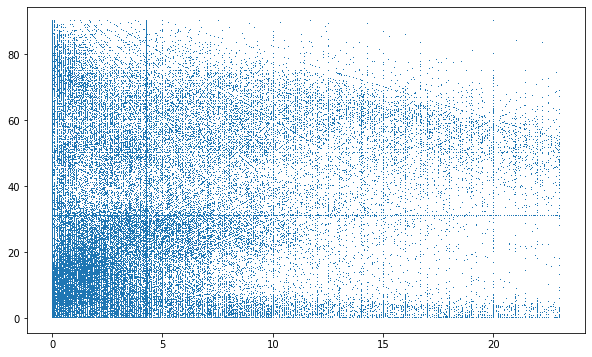

In [53]:
plt.figure(figsize=(10,6))
plt.plot(data['saturated-fat_100g'], data['carbohydrates_100g'], ',')

<a name='anova'></a>

## Implication of `energy_100g` on `nutrition_grade`

In [54]:
data2 = data[['nutrition_grade_fr', 'energy_100g']]
data2['energy_100g'] = np.sqrt(data2['energy_100g'])

<ipython-input-54-b4e75897df00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['energy_100g'] = np.sqrt(data2['energy_100g'])


In [55]:
lists = data2[['nutrition_grade_fr', 'energy_100g']].groupby('nutrition_grade_fr')['energy_100g'].apply(list)

In [56]:
lists = lists.drop('not specified')

<AxesSubplot: >

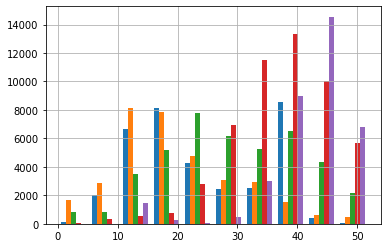

In [57]:
lists.hist()

In [58]:
np.std(lists['a'])

10.644622698415246

In [59]:
np.std(lists['b'])

10.141043455780974

In [60]:
np.std(lists['c'])

11.185367271762185

In [61]:
np.std(lists['d'])

8.101094003877892

In [62]:
np.std(lists['e'])

7.674742806497978

In [63]:
AnovaResults = f_oneway(*lists)

In [64]:
AnovaResults

F_onewayResult(statistic=30458.346243815045, pvalue=0.0)

## Correlation between `energy_100g` and `fat_100g`

In [65]:
AnovaResults2 = f_oneway(data['energy_100g'], data['fat_100g'])

In [66]:
AnovaResults2

F_onewayResult(statistic=721396.2658001967, pvalue=0.0)

<a name='PCA'></a>
# 4. PCA

In [67]:
quantitative_features = data.select_dtypes(include=np.number).columns.tolist()
X = data[quantitative_features]

In [68]:
quantitative_features

['energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g']

In [69]:
scaler = StandardScaler()

In [70]:
scaler.fit(X)

StandardScaler()

In [71]:
X_scaled = scaler.transform(X)
X_scaled[:5]

array([[ 2.40034515e-06, -2.70475397e-06, -2.71777012e-06,
         6.88054832e-06,  1.02824472e-05, -6.28697572e-05,
        -3.00217124e-06, -3.00306421e-06],
       [ 1.40703883e+00,  6.38801592e-01, -8.90237190e-01,
         1.25595034e+00,  2.42669044e-01,  1.88716221e+00,
        -2.58884368e-01, -2.59097390e-01],
       [ 2.33409633e+00,  4.17878357e+00,  2.34926235e-01,
        -5.58493321e-01, -6.82539555e-01,  1.88716221e+00,
         3.87273365e-01,  3.87108047e-01],
       [ 8.04993147e-01, -8.41898609e-01, -2.71777012e-06,
         1.95166351e+00,  1.02824472e-05,  3.16094017e-01,
        -3.00217124e-06, -3.00306421e-06],
       [ 1.39465743e+00,  6.75751505e-01, -4.87193575e-01,
         1.37239655e+00, -1.66520483e-01,  1.14306102e+00,
        -3.00217124e-06, -3.00306421e-06]])

In [72]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7
mean,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [73]:
n_components = 6

In [74]:
pca = PCA(n_components=n_components)

In [75]:
pca.fit(X_scaled)

PCA(n_components=6)

In [76]:
pca.explained_variance_ratio_

array([0.36473786, 0.28444907, 0.15903297, 0.10142837, 0.05038029,
       0.03374919])

In [77]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([36.47, 28.44, 15.9 , 10.14,  5.04,  3.37])

In [78]:
scree_cum = scree.cumsum().round()
scree_cum

array([36., 65., 81., 91., 96., 99.])

In [79]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

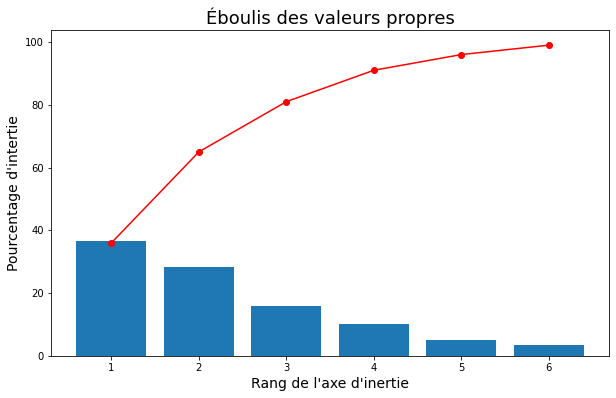

In [80]:
plt.figure(figsize=(10,6))
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("Rang de l'axe d'inertie", size=14)
plt.ylabel("Pourcentage d'intertie", size=14)
plt.title("Éboulis des valeurs propres", size=18)
plt.show()

In [81]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7
0,0.519290,0.487300,0.410210,0.238077,0.147602,0.325629,0.264701,0.264645
1,-0.229173,-0.021457,-0.093495,-0.393317,-0.480483,0.196543,0.506970,0.507019
2,0.051937,-0.322599,-0.337677,0.489000,0.349735,-0.329740,0.393106,0.393078
3,-0.199637,0.164440,0.511545,-0.368662,0.296046,-0.644399,0.127701,0.127727
4,0.272077,0.458555,-0.289066,0.158992,-0.543434,-0.554717,-0.043801,-0.043746
5,-0.024690,-0.457256,0.602426,0.418517,-0.491821,-0.100529,-0.010922,-0.010952


In [82]:
pcs.columns = quantitative_features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
F1,0.52,0.49,0.41,0.24,0.15,0.33,0.26,0.26
F2,-0.23,-0.02,-0.09,-0.39,-0.48,0.20,0.51,0.51
F3,0.05,-0.32,-0.34,0.49,0.35,-0.33,0.39,0.39
F4,-0.20,0.16,0.51,-0.37,0.30,-0.64,0.13,0.13
F5,0.27,0.46,-0.29,0.16,-0.54,-0.55,-0.04,-0.04
F6,-0.02,-0.46,0.60,0.42,-0.49,-0.10,-0.01,-0.01


In [83]:
pcs.T

,F1,F2,F3,F4,F5,F6
energy_100g,0.519290,-0.229173,0.051937,-0.199637,0.272077,-0.024690
fat_100g,0.487300,-0.021457,-0.322599,0.164440,0.458555,-0.457256
saturated-fat_100g,0.410210,-0.093495,-0.337677,0.511545,-0.289066,0.602426
carbohydrates_100g,0.238077,-0.393317,0.489000,-0.368662,0.158992,0.418517
sugars_100g,0.147602,-0.480483,0.349735,0.296046,-0.543434,-0.491821
proteins_100g,0.325629,0.196543,-0.329740,-0.644399,-0.554717,-0.100529
salt_100g,0.264701,0.506970,0.393106,0.127701,-0.043801,-0.010922
sodium_100g,0.264645,0.507019,0.393078,0.127727,-0.043746,-0.010952


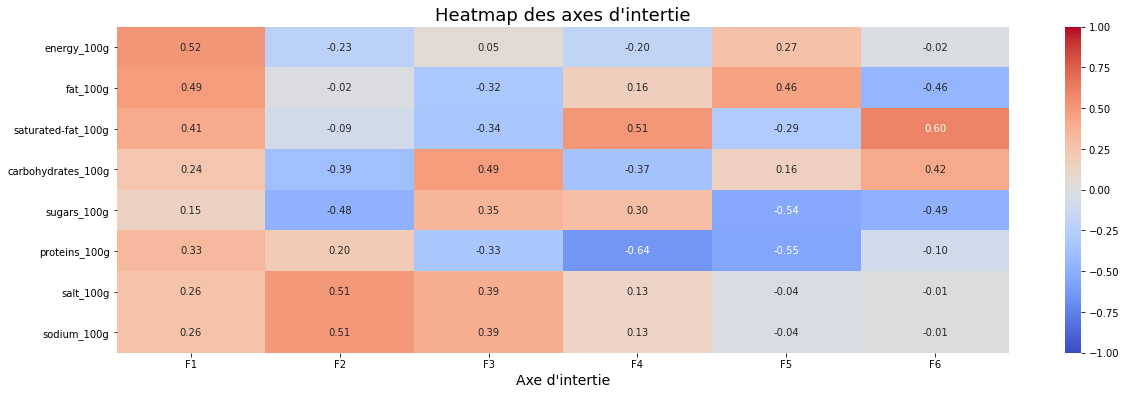

In [92]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.xlabel("Axe d'intertie", size=14)
ax.set_title("Heatmap des axes d'intertie", size=18)
plt.show()

In [85]:
x, y = 0,1

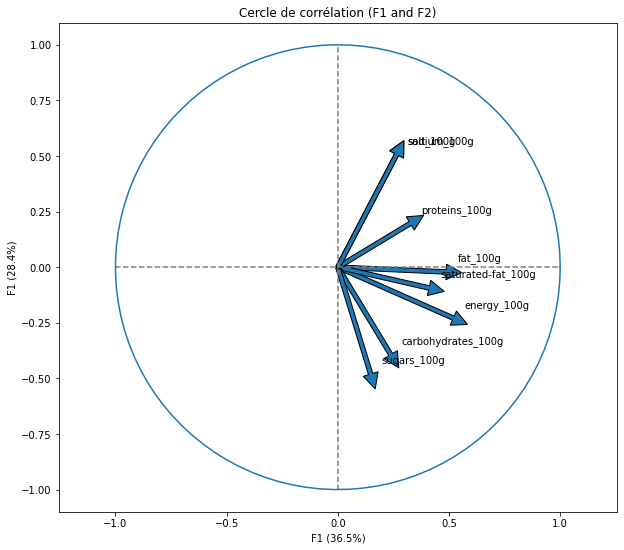

In [86]:
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             quantitative_features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle de corrélation (F{} and F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

In [93]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en un df
    X_ = pd.DataFrame(X_projected)
    
    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # On définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    # On rajoute la color, les clusters et les labels à X_
    X_["clusters"] =  clusters if clusters is not None else "None" 
    X_["labels"] =  labels if labels is not None else "None"
    c_unique_list = X_["clusters"].sort_values().unique()
    c_dict = {j:i+1 for i, j in enumerate(c_unique_list)}
    X_["colors"] = X_["clusters"].apply(lambda i : c_dict[i])

    # Pour chaque couleur / cluster
    for c in sorted(X_.clusters.unique()) : 
        # On selectionne le sous DF
        sub_X =X_.loc[X_.clusters == c, : ]

        # Clusters and color
        cluster = sub_X.clusters.iloc[0]
        color = sub_X.colors.iloc[0]

        # On affiche les points
        ax.scatter(    sub_X.iloc[:, x], 
                        sub_X.iloc[:, y], 
                        alpha=alpha, 
                        label = cluster ,
                        cmap="Set1", 
                        marker=marker)
        
    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_.iloc[:, x]).max() *1.1
    y_max = np.abs(X_.iloc[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    """if labels : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y, labels[i], fontsize='14', ha='center',va='center') """

    # Titre, legend et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    if clusters is not None: 
        plt.legend()
    plt.show()


In [96]:
X_proj = pca.transform(X_scaled)

In [98]:
x_y = (0, 1)

<ipython-input-93-941c88a29fe4>:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(    sub_X.iloc[:, x],


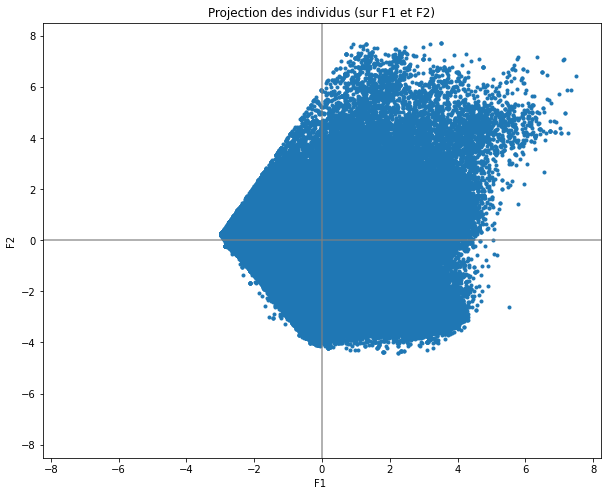

In [100]:
display_factorial_planes(X_proj, x_y)

# Application

## Mode écologie

If palm_oil:

    Find product with same product_group without palm_oil
    
If maybe_palm_oil:

    Find product with same product_group without maybe_palm_oil
    
## Mode santé

If nutrition_grade != a:

    Fine product with same product_group == a or b or c or d

OR same for additives:

    Find products with less unwanted additives (ex: fat)
    


In [120]:
def test_app(id):
    # input : code of product (object)
    
    display(data[data['code'] == id][['code', 'creator', 'product_name', 'nutrition_grade_fr', 'energy_100g', 'fat_100g', 'brand_1']])
    
    print()
    print('Produit : ', data.loc[data['code'] == id, 'product_name'].values[0])
    print('Groupe du produit : ', data.loc[data['code'] == id, 'product_group'].values[0])
    
    produit = data.loc[data['code'] == id, 'product_group'].values[0]
    
    print()
    print('Produits similaires :')
    display(data[data['product_group'] == produit][['code', 'creator', 'product_name', 'nutrition_grade_fr', 'energy_100g', 'fat_100g', 'brand_1']].sort_values(by='nutrition_grade_fr', ascending=True).head())

In [121]:
test_app('99410148')

,code,creator,product_name,nutrition_grade_fr,energy_100g,fat_100g,brand_1
288935,99410148,date-limite-app,nuts,not specified,1031.871034,10.771763,not specified



Produit :  nuts
Groupe du produit :  Salty snacks

Produits similaires :


,code,creator,product_name,nutrition_grade_fr,energy_100g,fat_100g,brand_1
241155,5000128635325,jm0804,appetizers,a,1699.0,12.0,co-op
215071,3564700263822,philae,nuts,a,497.0,1.5,notre-jardin
185820,3256221129182,cestki13,nuts,a,433.0,1.4,u
224802,3760032460087,sebleouf,nuts,a,953.0,1.0,inovfruit
224803,3760032460117,simonm,nuts,a,953.0,1.0,inovfruit


In [90]:
data[data['code'] == '99410148']['url'].values

array(['http://world-fr.openfoodfacts.org/produit/99410148'], dtype=object)